In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # Import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load dataset
data = pd.read_csv('ECS171_FINAL_DATASET.csv')

# Split dataset
X = data.drop('Revenue', axis=1)
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Gaussian Naive Bayes on resampled data
model = GaussianNB()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.47715598810489324
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.41      0.57      3124
           1       0.21      0.83      0.33       575

    accuracy                           0.48      3699
   macro avg       0.57      0.62      0.45      3699
weighted avg       0.82      0.48      0.53      3699

Confusion Matrix:
 [[1286 1838]
 [  96  479]]


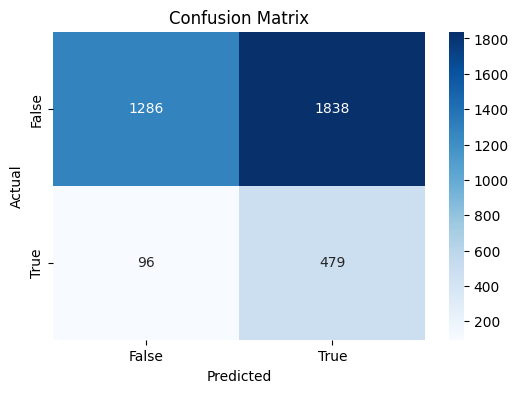

In [74]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


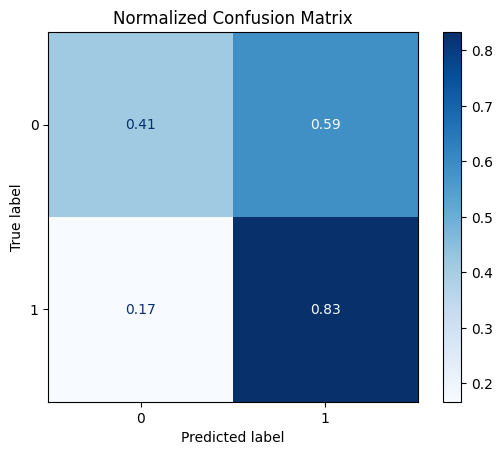

In [75]:
# Display normalized confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap="Blues", normalize="true", colorbar=True
)
plt.title("Normalized Confusion Matrix")
plt.show()

Results Report

Accuracy:

After applying SMOTE to generate synthetic samples of the minority class, the accuracy of our model shows to be around 48%. Although SMOTE has been applied, it is not uncommon for the accuracy of a model to stay low with highly unbalanced datasets. This is because accuracy, as a metric, does not account for the trade-offs between precision and recall, which are critical in the context of imbalanced data.

Precision, Recall, and F1-Score:
Class 0 (majority class):

Precision is high at ~93%, suggesting that most of the predicted cases for class 0 are correct. However, recall is considerably lower at 0.41, indicating that the model misses a significant portion of actual class 0 instances. This reflects a bias introduced by SMOTE, where the model's ability to distinguish between the majority and minority classes is impacted.
Class 1 (minority class):

Precision is very low at 21%, meaning the model generates a high proportion of false positives when predicting class 1. On the other hand, recall is relatively high at ~83%, indicating that the model is effective at identifying most actual instances of class 1. This increase in recall aligns with the purpose of SMOTE but at the expense of precision, leading to reduced overall reliability in identifying class 1 correctly.

Overall Observations:
Impact of SMOTE:
SMOTE successfully increased the model’s ability to detect instances of class 1. However, this improvement comes at the cost of precision for class 1, leading to a high number of false positives. Additionally, this shift has negatively impacted the model's ability to accurately classify class 0, as reflected in its reduced recall (41%).

False Positive and False Negative Trends:

High False Positives for Class 1: The model is overly sensitive to class 1, causing many class 0 instances to be incorrectly classified as class 1. This is evident from the confusion matrix, where a significant number of actual class 0 samples are misclassified.

Missed Class 0 Instances (False Negatives): The model struggles to retain recall for class 0, leading to many missed instances of the majority class.


Gaussian Naive Bayes Limitations:
The Gaussian Naive Bayes algorithm assumes feature independence and Gaussian distributions for the data, which may not align with the dataset characteristics, especially after applying SMOTE. The synthetic data generated by SMOTE might have introduced feature correlations or distributional changes that violate these assumptions, contributing to the high false positive rate for class 1 and the overall degraded performance on class 0.